# Steps

1. Find unique values, missing data, shape of df
2. Visualize ratings
3. Frequency plot of ratings
4. How often was a product rated a particular rating
5. Convert timestamp to something useable
6. 

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
#Importing Data

df = pd.read_csv('Datasets/Amazon Reviews.csv', names = ['User ID','Product ID','Rating','Time Stamp'], nrows=100000)
df['Time Stamp'] = df['Time Stamp'].apply(lambda x:datetime.fromtimestamp(x))
df = df.rename(columns={'Time Stamp':'Date'})
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13 04:00:00
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01 04:00:00
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29 04:00:00
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22 04:00:00
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18 04:00:00


In [3]:
df['Date'].dt.hour.value_counts()

4    100000
Name: Date, dtype: int64

### Since the time part of the time stamp is all at the same exact time we can omit it from the column

In [4]:
df['Date'] = df['Date'].dt.date
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


# Data Exploration

In [5]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :\n',df.nunique())
print('\nMissing values in columns:\n',df.isnull().sum())
print('\nDuplicated rows: \n',df.duplicated().value_counts())
print('\nData Types of each column: \n', df.dtypes)

Rows     : 100000
Columns  : 4

Features :
     : ['User ID', 'Product ID', 'Rating', 'Date']

Missing values    : 0

Unique values :
 User ID       89938
Product ID     6918
Rating            5
Date           5477
dtype: int64

Missing values in columns:
 User ID       0
Product ID    0
Rating        0
Date          0
dtype: int64

Duplicated rows: 
 False    100000
dtype: int64

Data Types of each column: 
 User ID               object
Product ID            object
Rating               float64
Date          datetime64[ns]
dtype: object


1. Total number of each rating
2. Total number of ratings per user
3. Percentage of ratings (quantiles)

# Data Visualization

## 1. Total Number of Each Rating

<AxesSubplot:xlabel='Rating', ylabel='count'>

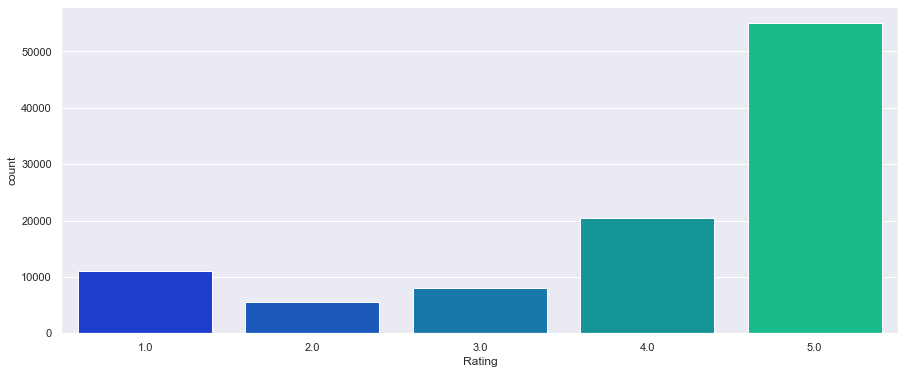

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Rating', palette = 'winter')

## 2. Percentage of Number of Ratings given

<AxesSubplot:xlabel='Rating'>

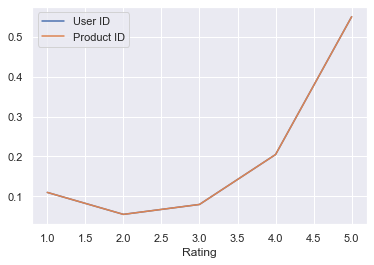

In [61]:
(df.groupby('Rating').count()/100000).plot()

## Number of User Ratings

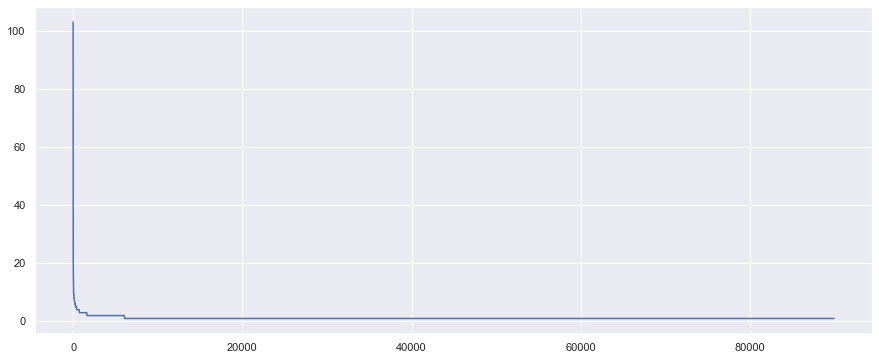

In [7]:
number_of_ratings = df.groupby('User ID')['Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(15,6))
plt.plot(number_of_ratings.values)

Above we can see the number of ratings each user has given in the data set. The maximum rating any user has given is **Max Number**

## Time Series Visualizations

1. How the number of orders changed throughout time
2. What time of the year is busiest
3. How correlated are the number of orders with holidays
4. How many products are ordered throughout the week. Are there higher numbers during weekends than weekdays?
5. For ease of visualizations take time for only the past decade.
6. Examine peaks in 2013 and 2014

In [8]:

#Set the time stamp as the index
df.reset_index(drop=True,inplace=True)
df.sort_values('Date', ascending=True,inplace=True)
df.set_index('Date',inplace=True)
df.head()

,User ID,Product ID,Rating
Date,,,
1998-12-04,A2ZUNCI13N2OUL,B00000DM9D,4.0
1998-12-07,A28AXJL31RXUON,B00000DM9M,4.0
1998-12-18,AFHLJPG5ZIMNO,B00000DM96,5.0
1998-12-26,AY2NE9ZEZ5LCE,B00000DM9D,5.0
1999-05-02,A2LG0LV5RI86F0,B00000DM93,5.0


### For ease of visualizations lets take orders from 2006 onwards

In [9]:
df_timeseries = df.loc['2006-01-01':]
df_timeseries

,User ID,Product ID,Rating
Date,,,
2006-01-01,A1S7LXQEXMJLBP,B00001P4XA,3.0
2006-01-01,A2V7EO331SFUF6,B00000K4KH,5.0
2006-01-01,A17JQIGHZCK73L,B00004Y2ZF,4.0
2006-01-01,A2DL5VAZ2F9CU6,B00000J0D8,2.0
2006-01-01,A14C44S6ETSY1N,B00004ZCKV,5.0
...,...,...,...
2014-07-22,A2WFKCI27CHOXX,9486350493,5.0
2014-07-22,A2M4BWBQZOPCIU,B00001QEMF,1.0
2014-07-22,A2YI83UP0RTEX9,B00004WCGF,5.0


### We can already begin to see that there are gaps in the dates. We do not have data for all days of the months.

## 1. How the number of orders have changed throughout the years

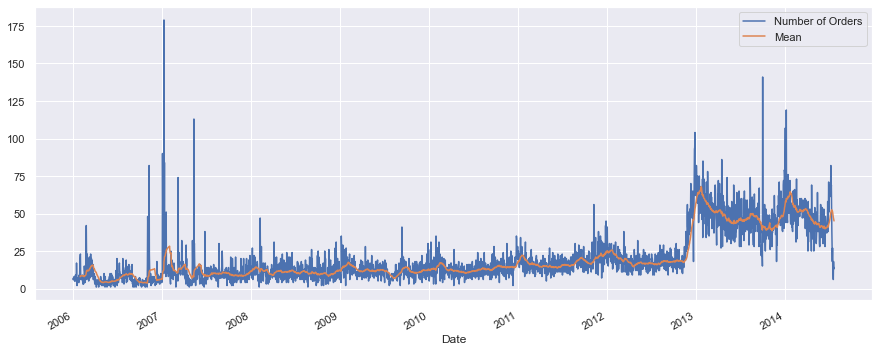

In [53]:
df_timeseries.groupby('Date')['User ID'].count()
plt.figure(figsize=(15,6))
plt.plot(df_timeseries.groupby('Date')['User ID'].count())
df_timeseries.groupby('Date')['User ID'].count().rolling(window=30).mean().plot()
plt.legend(['Number of Orders','Mean'])

### The number of daily orders have remained fairly consistent through the beginning of the 21st century and saw an exponential increase in 2013.

In [11]:
#Creating month and year column
df_timeseries['Month'] = df_timeseries.index.month
df_timeseries['Year'] = df_timeseries.index.year

## 2. How the number of orders look on a yearly level

     Year  Month  User ID  Product ID  Rating
0    2006      1      259         259     259
1    2006      2      304         304     304
2    2006      3      380         380     380
3    2006      4      126         126     126
4    2006      5      125         125     125
..    ...    ...      ...         ...     ...
98   2014      3     1631        1631    1631
99   2014      4     1312        1312    1312
100  2014      5     1290        1290    1290
101  2014      6     1284        1284    1284
102  2014      7      967         967     967

[103 rows x 5 columns]


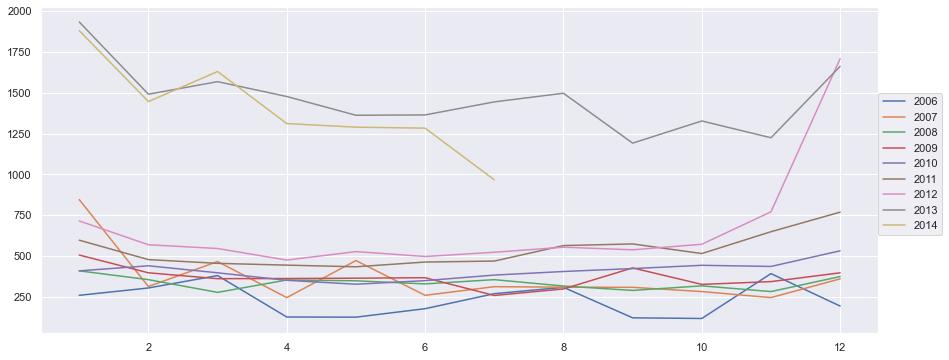

In [19]:
df_timeseries_group_month = df_timeseries.groupby(['Year','Month']).count().reset_index()
print(df_timeseries_group_month)

plt.figure(figsize=(15,6))
for i in df_timeseries_group_month['Year'].unique():
    plt.plot('User ID', data = df_timeseries_group_month[df_timeseries_group_month['Year'] == i].set_index('Month'))

plt.legend(['2006','2007','2008','2009','2010','2011','2012','2013','2014'], loc=(1,0.3))
plt.show()

In [20]:
df_timeseries_group_month[df_timeseries_group_month['Year'] == 2013]

,Year,Month,User ID,Product ID,Rating
84,2013,1,1935,1935,1935
85,2013,2,1492,1492,1492
86,2013,3,1569,1569,1569
87,2013,4,1478,1478,1478
88,2013,5,1363,1363,1363
89,2013,6,1365,1365,1365
90,2013,7,1445,1445,1445
91,2013,8,1498,1498,1498
92,2013,9,1192,1192,1192
93,2013,10,1328,1328,1328


### 3. Do the number of orders have anything to do with holidays of the year?

### 4. How many products are ordered throughout the week. Are there a higher number of orders on the weekends?
### For ease, we will only consider this for the year 2013. The below graph looks at the daily number of orders throughout the year

<AxesSubplot:xlabel='Date'>

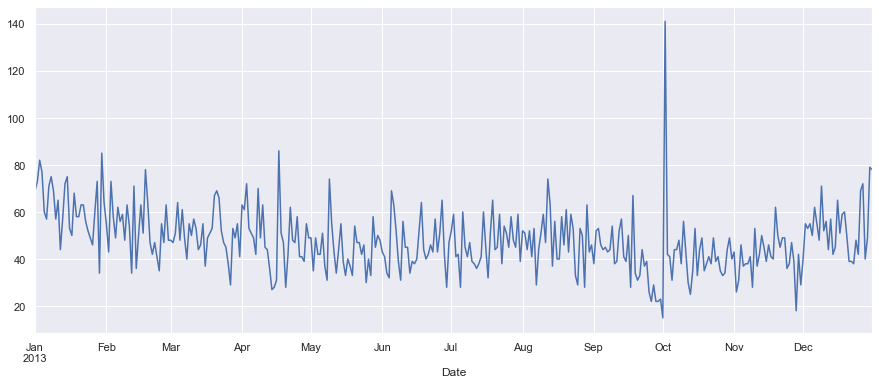

In [18]:
# Grabbing values for only 2013
df_timeseries_2013 = df_timeseries[df_timeseries.index.year == 2013]

plt.figure(figsize=(15,6))
df_timeseries_2013.groupby('Date')['User ID'].count().plot()

### Now lets break this down to a weekly level and see how it looks for each month

    Month  Day of Week Day of Week Name  User ID  Product ID  Rating  Year
0       1            0              Mon      279         279     279   279
1       1            1              Tue      316         316     316   316
2       1            2              Wed      336         336     336   336
3       1            3            Thurs      305         305     305   305
4       1            4              Fri      259         259     259   259
..    ...          ...              ...      ...         ...     ...   ...
79     12            2              Wed      212         212     212   212
80     12            3            Thurs      223         223     223   223
81     12            4              Fri      241         241     241   241
82     12            5              Sat      176         176     176   176
83     12            6              Sun      221         221     221   221

[84 rows x 7 columns]


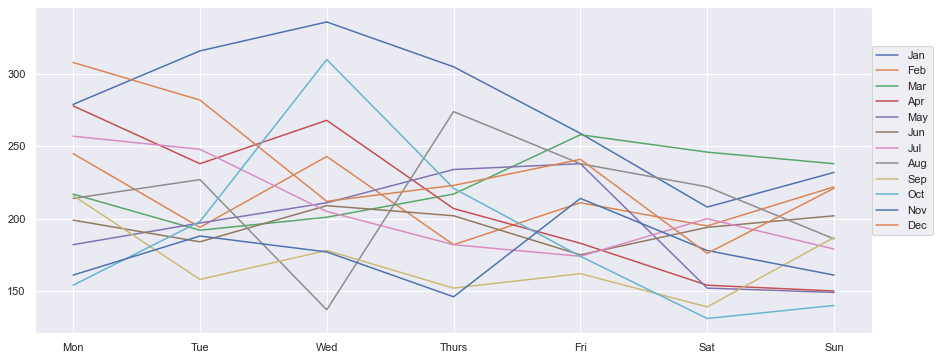

In [13]:
# Getting day of week
df_timeseries_2013['Day of Week'] = df_timeseries_2013.index.weekday
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week']

# Converting day of week numbers to names
df_timeseries_2013['Day of Week Name'] = df_timeseries_2013['Day of Week Name'].replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])

# Grouping to get the number of orders in a week per month of 2013
df_timeseries_2013_grouped = df_timeseries_2013.groupby(['Month','Day of Week','Day of Week Name']).count().reset_index()
df_timeseries_2013_grouped = df_timeseries_2013_grouped.sort_index(level='Day of Week')
print(df_timeseries_2013_grouped)

#Plotting number of orders in a week for 2013
plt.figure(figsize=(15,6))
for i in df_timeseries_2013_grouped['Month'].unique():
    plt.plot('User ID', data = df_timeseries_2013_grouped[df_timeseries_2013_grouped['Month'] == i].set_index('Day of Week Name'))

plt.legend(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], loc=(1,0.3))

### January far exceeds all other months in terms of number of orders made

In [40]:
df_2013_grouped = pd.DataFrame(df_timeseries_2013.groupby('Date')['User ID'].count())
df_2013_grouped[df_2013_grouped['User ID'] == df_2013_grouped['User ID'].max()]

,User ID
Date,
2013-10-02,141


In [46]:
df_2013_grouped.loc['2013-09-28':'2013-10-5']

,User ID
Date,
2013-09-28,22
2013-09-29,22
2013-09-30,23
2013-10-01,15
2013-10-02,141
2013-10-03,42
2013-10-04,41
2013-10-05,31
